<a href="https://colab.research.google.com/github/jweir136/Stock-Prediction-2/blob/master/StockPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split

%matplotlib inline

!pip install stockstats

from stockstats import StockDataFrame as Sdf

np.random.seed(42)

F = pd.read_csv("F.csv")
RACE = pd.read_csv("RACE.csv")
TSLA = pd.read_csv("TSLA.csv")

In [0]:
F_stock = Sdf.retype(F)
RACE_stock = Sdf.retype(RACE)
TSLA_stock = Sdf.retype(TSLA)

In [0]:
F['sma'] = F_stock['close_10_sma']
F['boll'] = F_stock['boll']

RACE['sma'] = RACE_stock['close_10_sma']
RACE['boll'] = RACE_stock['boll']

TSLA['sma'] = TSLA_stock['close_10_sma']
TSLA['boll'] = TSLA_stock['boll']

In [0]:
F_X = F[['sma', 'boll']].shift(10).dropna()
F_y = F['adj close'][10:]

F_trainX, F_testX, F_trainY, F_testY = train_test_split(F_X.values, F_y.values, test_size=.2)

RACE_X = RACE[['sma', 'boll']].shift(10).dropna()
RACE_y = RACE['adj close'][10:]

RACE_trainX, RACE_testX, RACE_trainY, RACE_testY = train_test_split(RACE_X.values, RACE_y.values, test_size=.2)

TSLSA_X = TSLA[['sma', 'boll']].shift(10).dropna()
TSLA_y = TSLA['adj close'][10:]

TSLA_trainX, TSLA_testX, TSLA_trainY, TSLA_testY = train_test_split(TSLA_X.values, TSLA_y.values, test_size=.2)

In [0]:
lr = Pipeline([
    #("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

In [0]:
F_score = cross_val_score(lr, F_trainX, F_trainY, cv=10, scoring='neg_mean_squared_error')
RACE_score = cross_val_score(lr, RACE_trainX, RACE_trainY, cv=10, scoring='neg_mean_squared_error')
TSLA_score = cross_val_score(lr, TSLA_trainX, TSLA_trainY, cv=10, scoring='neg_mean_squared_error')

In [75]:
lr.fit(RACE_trainX, RACE_trainY)
print("RACE score: {}".format(lr.score(RACE_testX, RACE_testY)))

lr.fit(F_trainX, F_trainY)
print("F score: {}".format(lr.score(F_testX, F_testY)))

lr.fit(TSLA_trainX, TSLA_trainY)
print("TSLA score: {}".format(lr.score(TSLA_testX, TSLA_testY)))

RACE score: 0.9725756084239928
F score: 0.8948068671494994
TSLA score: 0.973466584869915


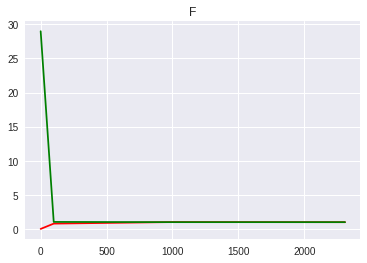

In [76]:
train_sizes = [1, 100, 1000, 2308]

train_size, train_score, test_score = learning_curve(
  estimator=lr,
  X=F_trainX,
  y=F_trainY,
  scoring='neg_mean_squared_error',
  cv=5,
  train_sizes=train_sizes
)

mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.title("F")
plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')

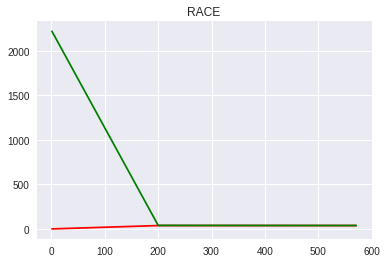

In [77]:
train_sizes = [1, 200, 571]

train_size, train_score, test_score = learning_curve(
  estimator=lr,
  X=RACE_trainX,
  y=RACE_trainY,
  cv=10,
  scoring='neg_mean_squared_error',
  train_sizes=train_sizes
)

mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.title("RACE")
plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')

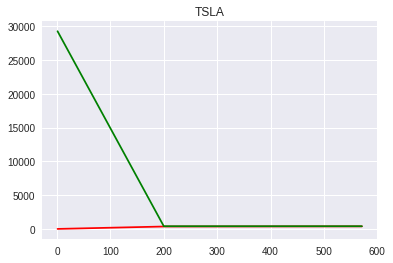

In [78]:
train_sizes = [1, 200, 571]

train_size, train_score, test_score = learning_curve(
  estimator=lr,
  X=TSLA_trainX,
  y=TSLA_trainY,
  cv=10,
  scoring='neg_mean_squared_error',
  train_sizes=train_sizes
)

mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.title("TSLA")
plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')